# Predict Diabetes using with Machine Learnin

In [35]:
# Import Packages
import pandas as pd # Used to work with datasets

import numpy as np # Used to work with arrays

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split #divide the data into training data and test data

from sklearn.neighbors import KNeighborsClassifier #Classifier implementing the k-nearest neighbors vote

from sklearn.tree import DecisionTreeClassifier## is a class capable of performing multiclass classification on a dataset.

from sklearn.neural_network import MLPClassifier#Iteratively trains because at each time step the partial derivatives of the loss function with respect to the model parameters are computed. 

from sklearn.preprocessing import StandardScaler## Removes the average and scales each feature/variable for unit variance. This process is carried out in an independent manner

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [36]:
#read data
diabetes = pd.read_csv('data/diabetes.csv')


In [37]:
#name columns 
print(diabetes.columns) 

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [38]:
diabetes.head() # Show part of the data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [39]:
#shape data
print("dimension of diabetes data: {}".format(diabetes.shape))

dimension of diabetes data: (768, 9)


The diabetes dataset consists of 768 data points, with 9 features each:

In [64]:
## print about information  
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [66]:
## print describtion data 
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


"outcome" Is the feature that I will expect, 0 means no diabetes, 1 means presence

In [67]:
print(diabetes.groupby('Outcome').size())

Outcome
0    500
1    268
dtype: int64


500 is rated as 0 and 268 as 1:

<AxesSubplot:xlabel='Outcome', ylabel='count'>

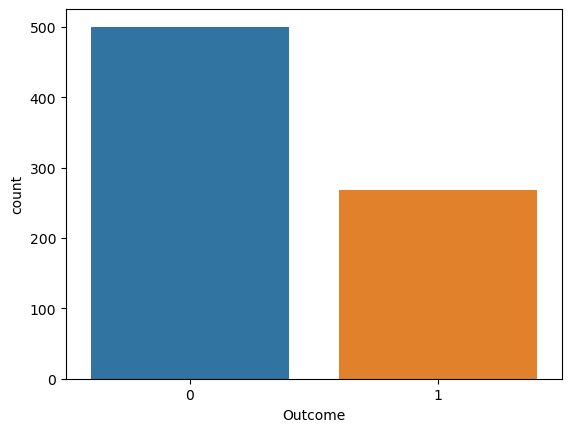

In [41]:
## The number of views in each categorical basket using bars.
sns.countplot(data= diabetes , x='Outcome',label="Count")


<AxesSubplot:xlabel='Pregnancies', ylabel='count'>

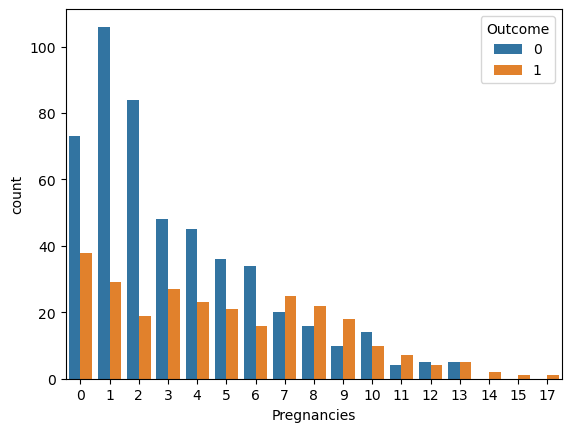

In [42]:
sns.countplot(data= diabetes , x='Pregnancies' , hue="Outcome")

In [44]:
X= diabetes.drop(columns=['Outcome']) # data
y=  diabetes['Outcome']  #target

In [74]:
def evaluate(Model,x,target):
    model=Model()
    x_train,x_test ,y_train , y_test=train_test_split(x , target ,test_size=0.25 )
    model.fit(x_train , y_train)
    pred_y=model.predict(x_test)
    print("model :", model)
    print("R2 Score" ,r2_score(y_test , pred_y))
    print( "MSE: " ,mean_squared_error(y_test , pred_y))
    print("RMSE:",np.sqrt(mean_squared_error(y_test, pred_y)))

## K Nearest Neighbour predicted

It can be said that the Neighbors Nearest-k ,It is the simplest machine learning algorithm composed Build the model only from storing the training data set. To make a forecast for a new point in a group data, the algorithm finds the closest data points in the training data set

First, let's see if we can confirm the relationship between model complexity and accuracy:

In [75]:
X= diabetes.drop(columns=['Outcome']) # data
y=  diabetes['Outcome']  #target

In [76]:
#split data into train ,split
X_train, X_test, y_train, y_test = train_test_split(X,y , random_state=66)

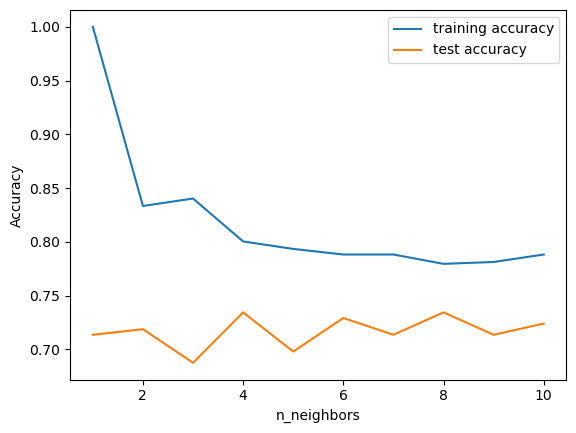

In [77]:
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
	# bulding nodel
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record test set accuracy
    test_accuracy.append(knn.score(X_test, y_test))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

In [78]:
evaluate(KNeighborsClassifier, X,y)

model : KNeighborsClassifier()
R2 Score -0.32264257481648806
MSE:  0.3177083333333333
RMSE: 0.5636562191028618


In [79]:
## We check   accuracy of the k-nearest neighbors algorithm for predicting diabetes
knn.score(X_test,y_test)

0.7239583333333334

## Decision tree classifier

In [51]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train,y_train))) # To calculate the accuracy of the training data
print("Accuracy on test set: {:.3f}".format(tree.score(X_test,y_test)))   # To calculate the accuracy of the test data

Accuracy on training set: 1.000
Accuracy on test set: 0.729


The accuracy on the training set using the decision tree classifier is 100

While the accuracy of the test set is much worse. This is an indication that the tree is suffering from over-adjustment


overfitting 

It does not generalize well to new data. Therefore, we need to apply pre-pruning
  on the tree

Now I will do it again by setting
3 = depth_m
Which reduces the depth of the tree.
This leads to a lower accuracy in the training set, but improves the test set. 

In [52]:
tree = DecisionTreeClassifier(max_depth=3, random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train,y_train)))  # To calculate the accuracy of the training data

print("Accuracy on test set: {:.3f}".format(tree.score(X_test,y_test)))  # To calculate the accuracy of the test data

Accuracy on training set: 0.793
Accuracy on test set: 0.714


## Neural networks for predicting diabetes

In [53]:
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)
print("Accuracy on training set: {:.2f}".format(mlp.score(X_train,y_train))) # To calculate the accuracy of the training data
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test,y_test))) # To calculate the accuracy of the testing data


Accuracy on training set: 0.76
Accuracy on test set: 0.68


The accuracy of the multilayer perceptron (MLP) is not at all as good as other models
This is likely due to data scaling. Deep learning algorithms also expect you to vary
All input features in a similar way, and it's best to have a mean of 0, and a variance of 1. Now I'm going to We rescaled our data to meet these requirements to predict diabetes with good accuracy.

In [54]:
scaler = StandardScaler()
#fit_transform 
## It is used on the training data so that we can scale the training data and also know the measurement parameters of that data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)


MLPClassifier(random_state=0)

In [55]:
print("Accuracy on training set: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled,y_test)))


Accuracy on training set: 0.826
Accuracy on test set: 0.750


Now we increase the number of iterations and the alpha parameter and add stronger coefficients to the weights of the model:

In [56]:
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format( mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled,y_test)))


Accuracy on training set: 0.818
Accuracy on test set: 0.760


Our model so far is the default neural network model after measurement. Now I will draw a heat map of the weights of the first layer of the learned neural network in order to predict diabetes using the dataset.

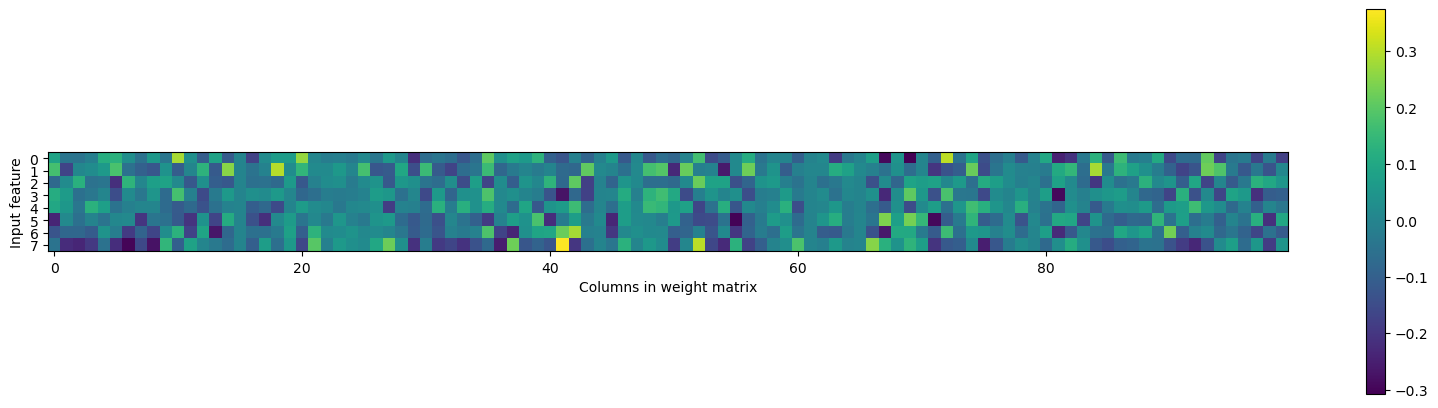

In [57]:
plt.figure(figsize=(20, 5)) # 
plt.imshow(mlp.coefs_[0])
plt.yticks(range(8)) 
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()
plt.show()